In [12]:
# libraries
import pandas as pd
import numpy as np
%pip install -q plotnine
from plotnine import *


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_ready_231029.csv to data_ready_231029.csv


In [15]:
# loading data C:\Users\HelenSepman\OneDrive - Kruvelab\Documents\GitHub\ML_calibration_graph_linearity\data
#file_path = "C:/Users/HelenSepman/OneDrive - Kruvelab/Documents/GitHub/ML_calibration_graph_linearity/data/data_ready_231029.csv"
file_path = "data_ready_231029.csv"
df_calibrations = pd.read_csv(file_path)
df_calibrations_lab1 = df_calibrations[df_calibrations['lab']=='L1']
df_calibrations['conc_to_area'] = df_calibrations['c_real_M'] / df_calibrations['peak_area']
df_calibrations['area_to_RT'] = df_calibrations['peak_area'] / df_calibrations['RT']
#df_calibrations_lab1 = df_calibrations_lab1[df_calibrations_lab1['compound'].isin(["Amitrole", "Vancomycin_H2"])]

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 6 rows containing missing values.


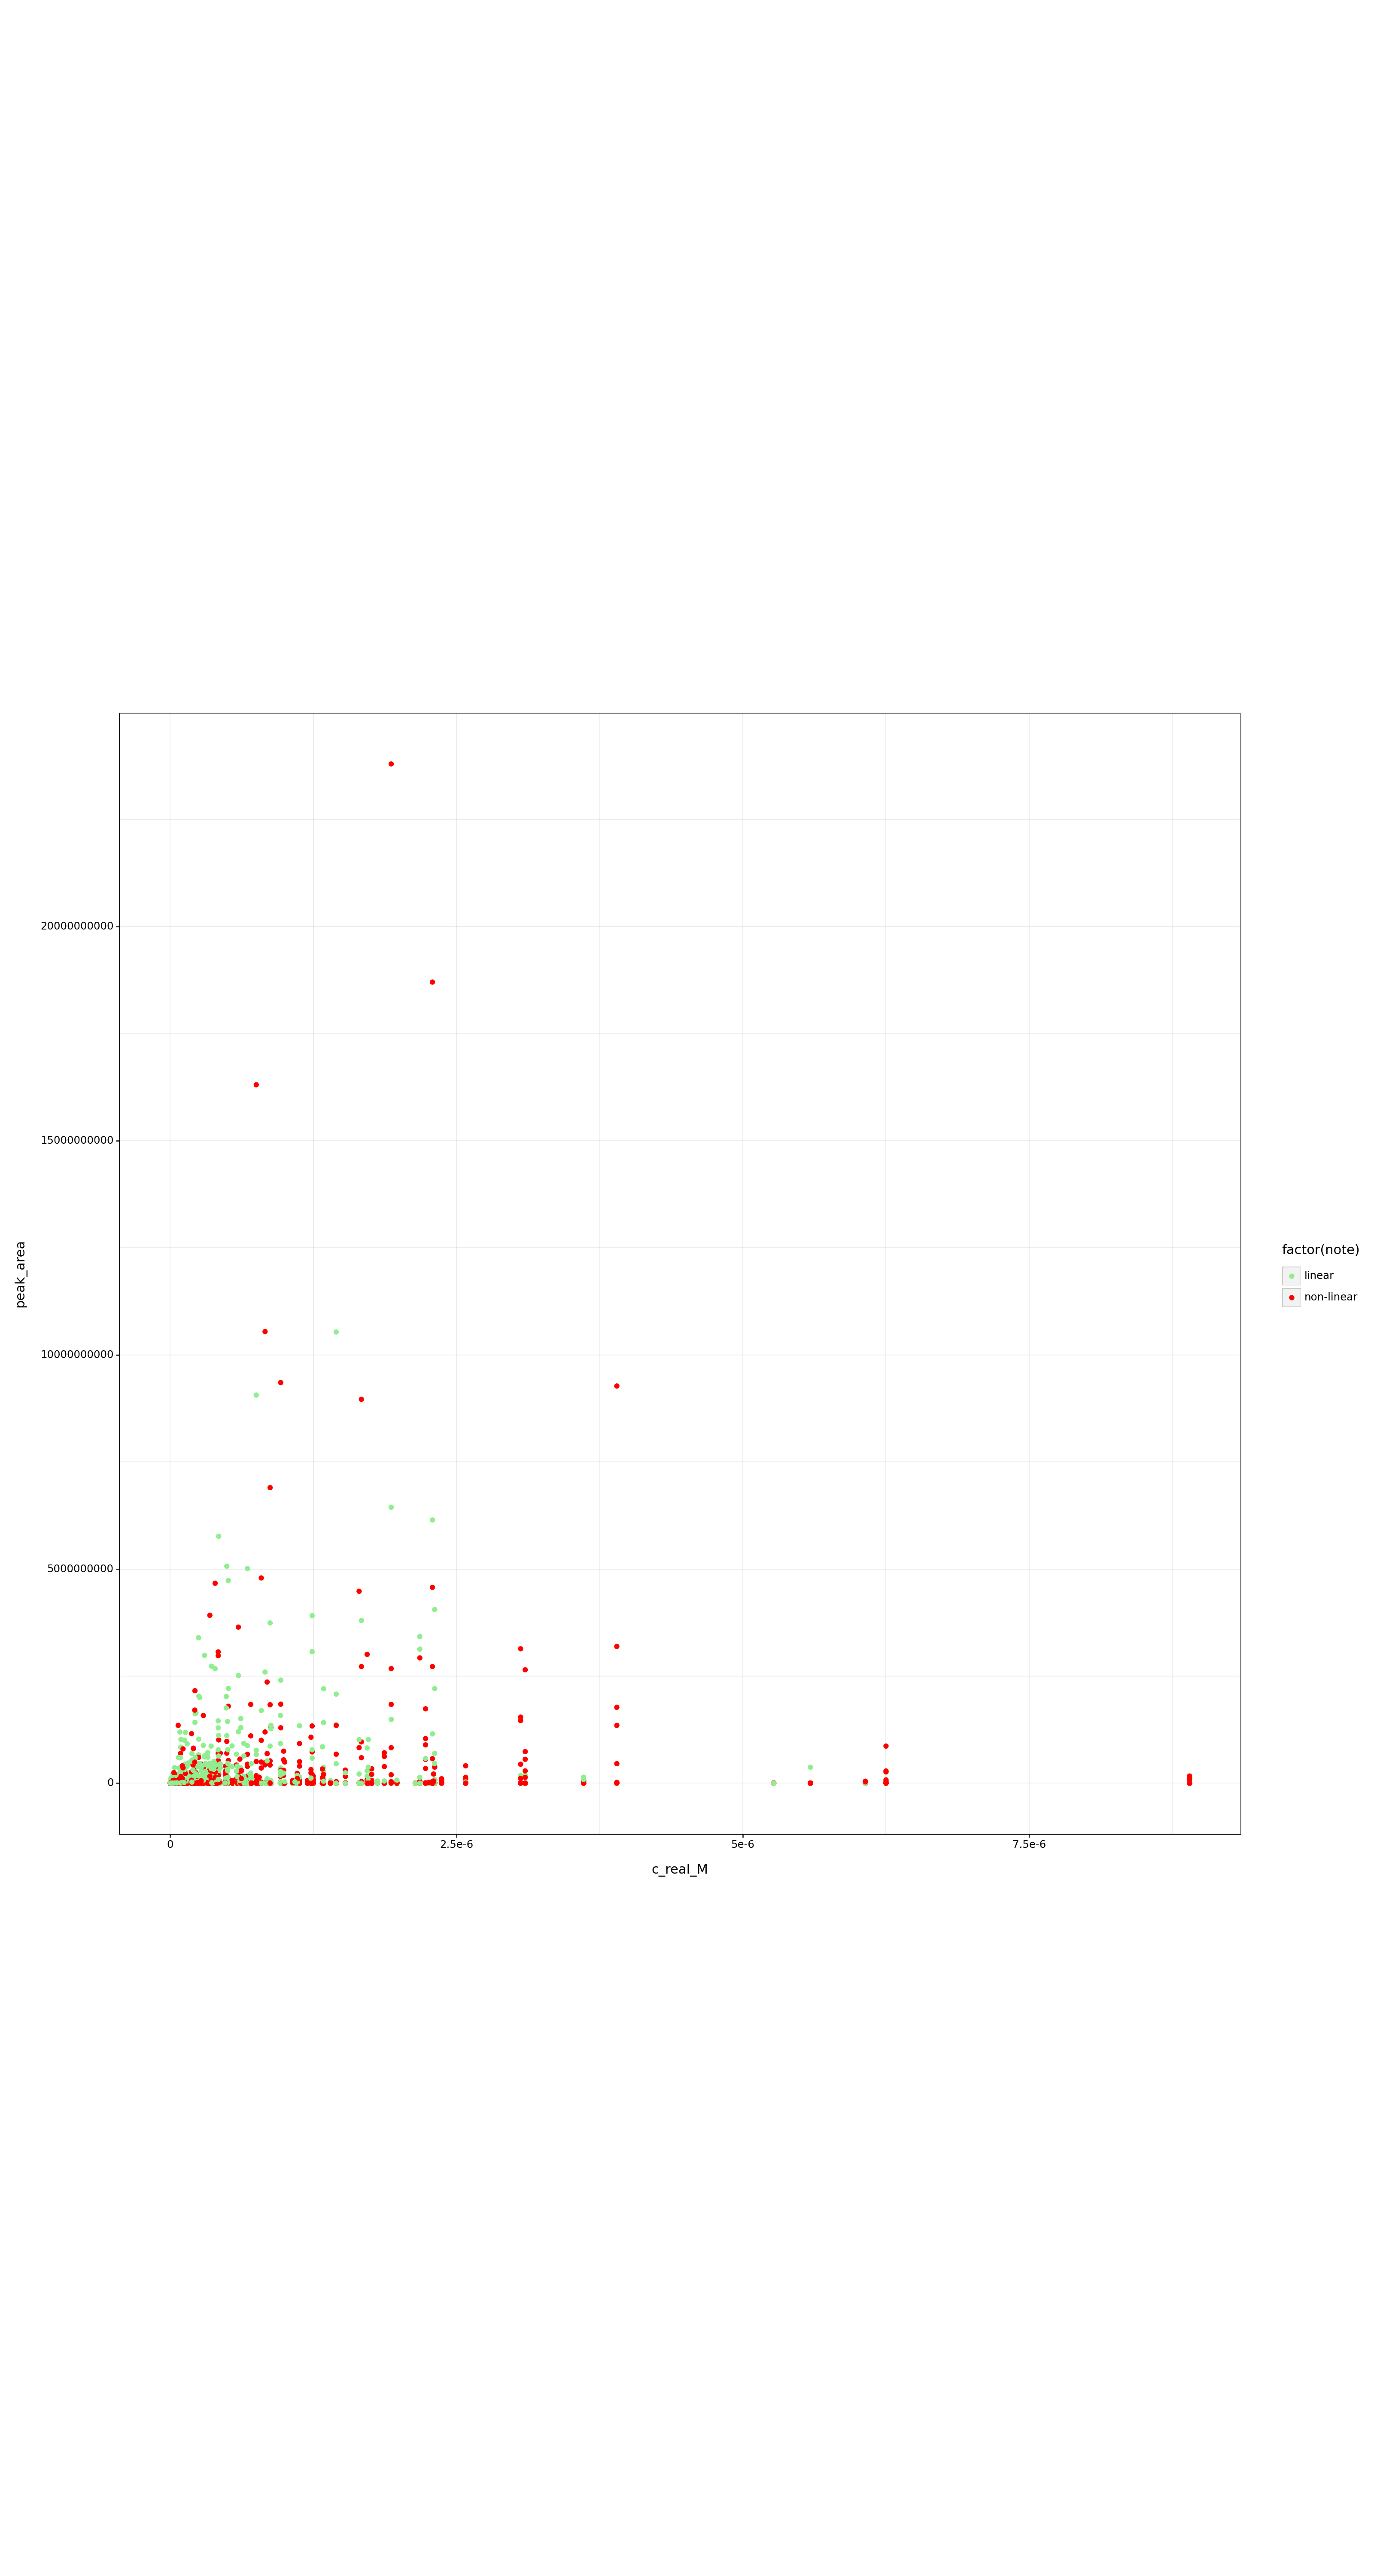

<Figure Size: (1600 x 3000)>

In [19]:
fig = (
    ggplot(data = df_calibrations,
          mapping = aes(x = 'c_real_M', y = 'peak_area')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    theme_bw() +
    theme(figure_size = (16, 30),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          )
)
fig

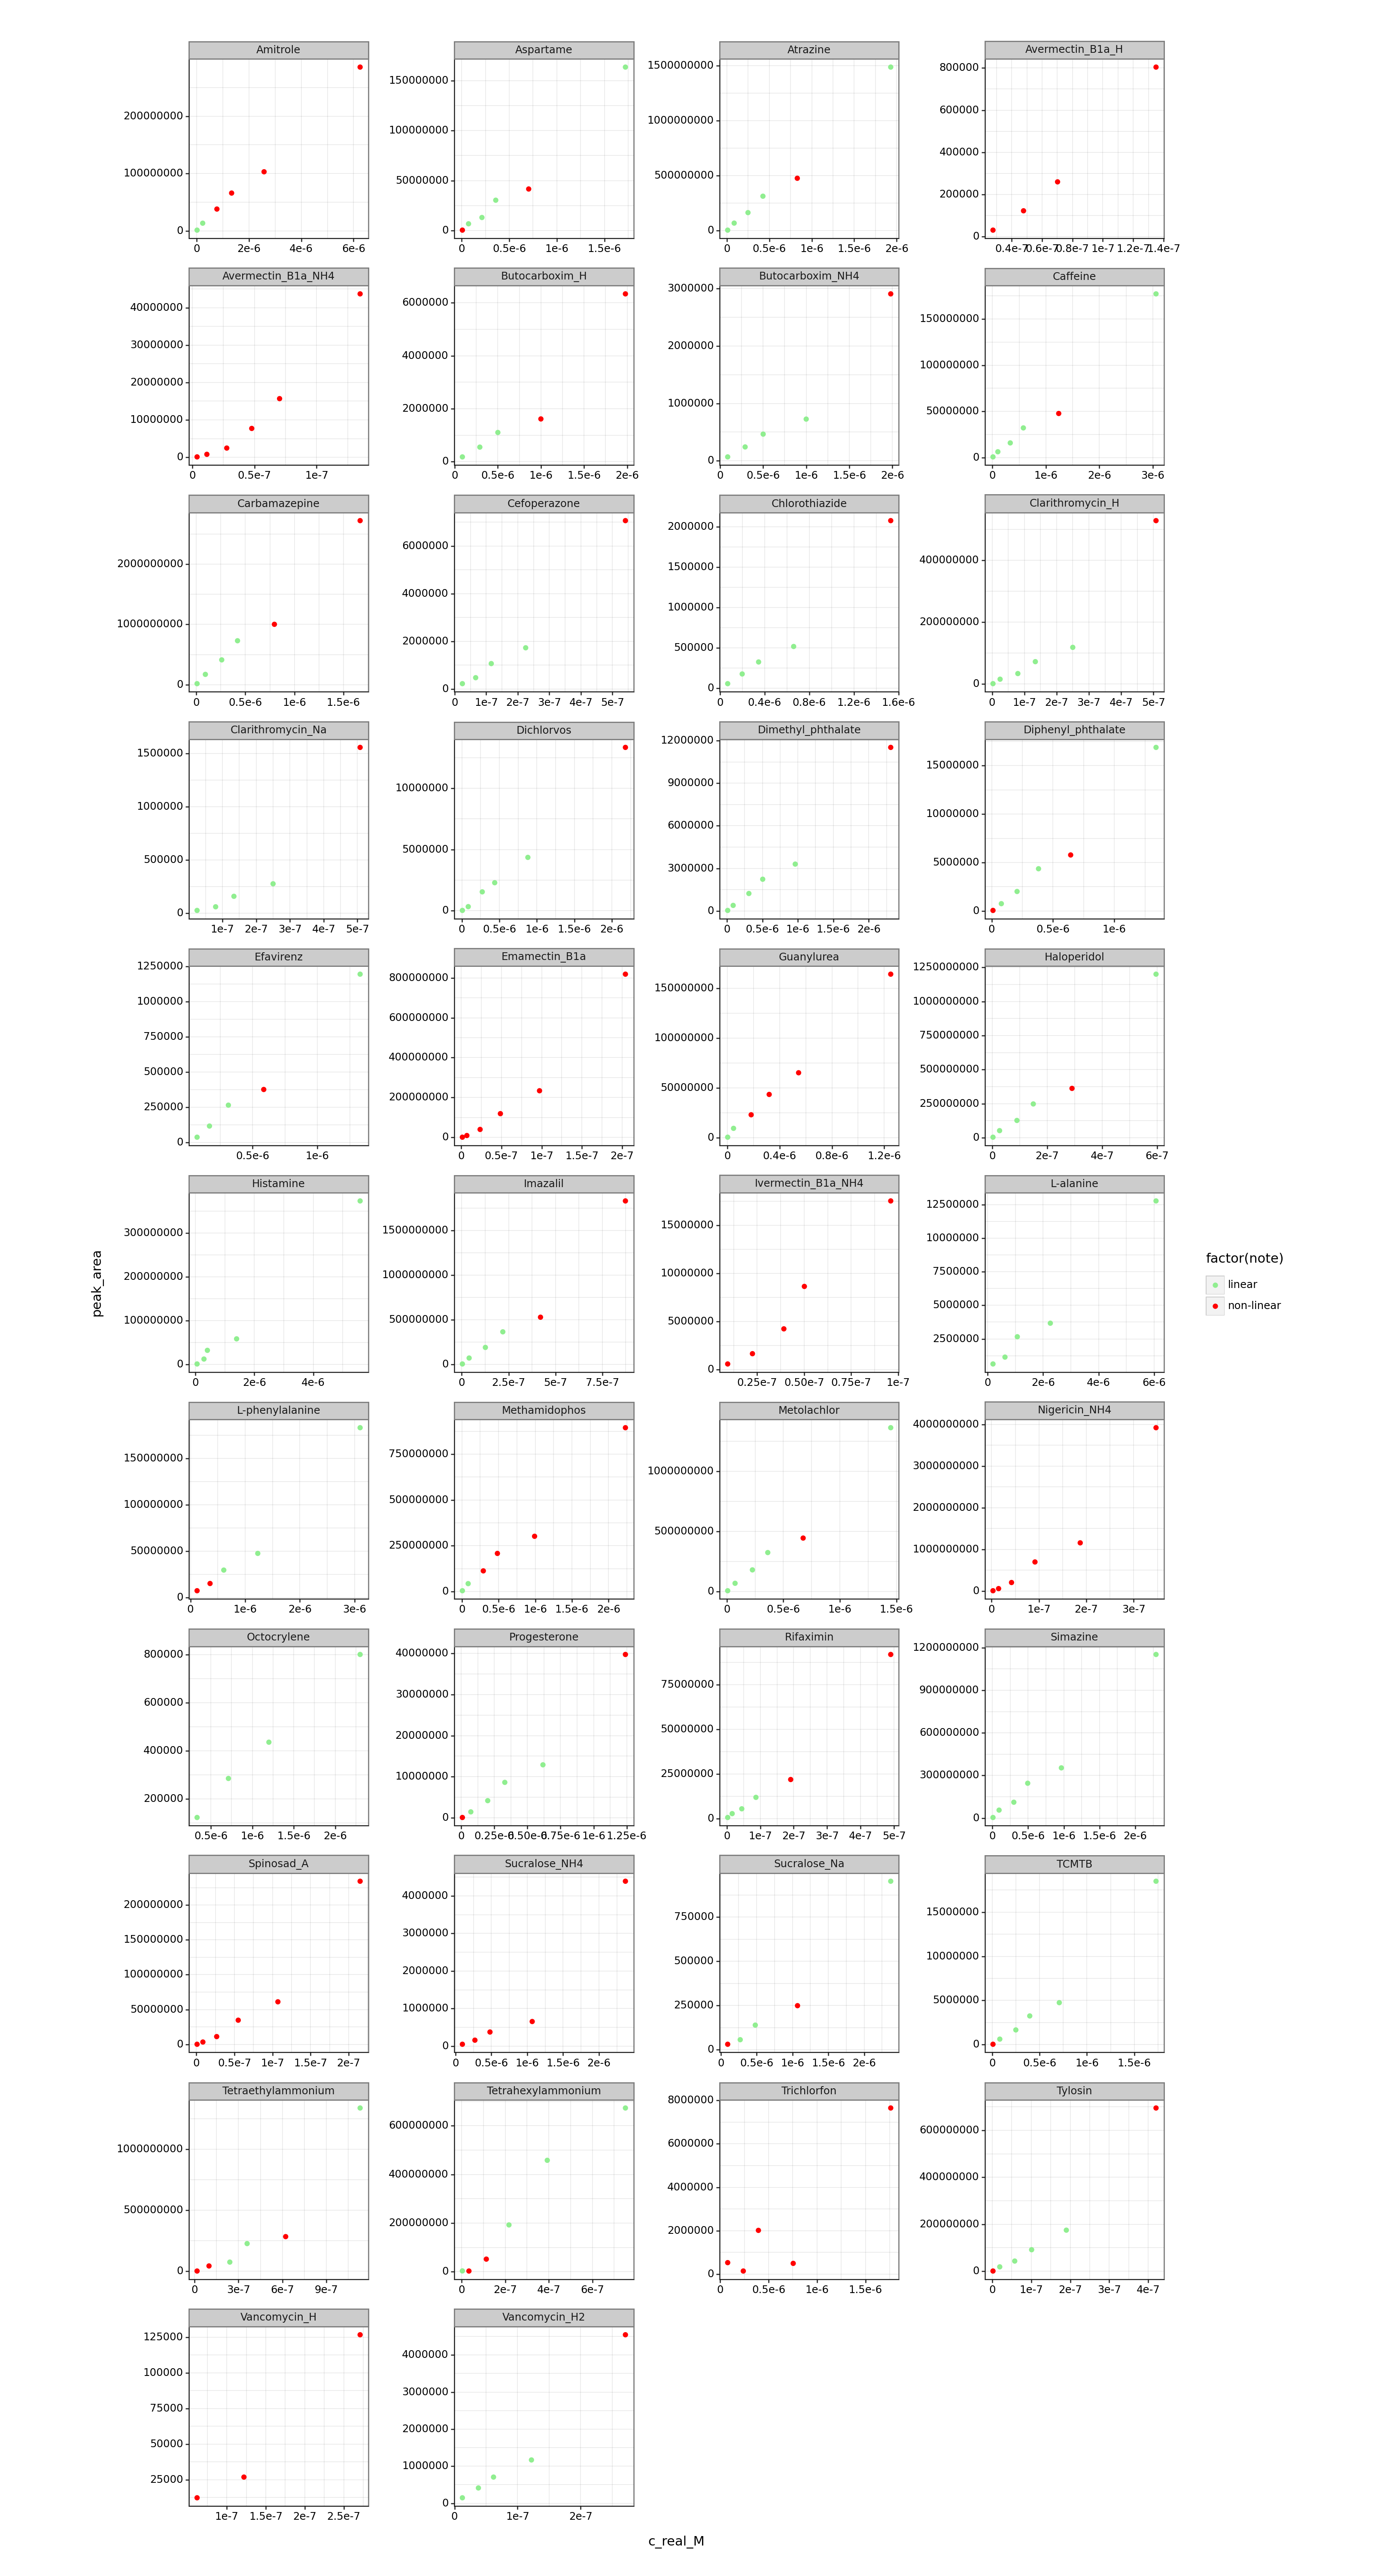

<Figure Size: (1600 x 3000)>

In [4]:
fig = (
    ggplot(data = df_calibrations_lab1,
          mapping = aes(x = 'c_real_M', y = 'peak_area')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    theme_bw() +
    facet_wrap("compound",
               ncol=4,
               scales="free") +
    theme(figure_size = (16, 30),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          )
)
fig

#### Notes from calibration graphs
* Some points might be super difficult to classify
* scaling is needed
* can one of the additional confirmational parameters be "if we fit a line through "linear" points, the average residuals for non-linear and linear points are different by X; for linear the average residual is less than y" etc?

#### Potential solutions to try to classify linear and non-linear points
* CNN pattern recognition? Would we need to transfer this data to a AxA grid matrix for all?

#### Final objective
Extract slope for the calibration graph points within linear range
As no ML algorithm is 100% accurate, we could give lower weights to the "non-linear" classified datapoints when fitting linear regression.

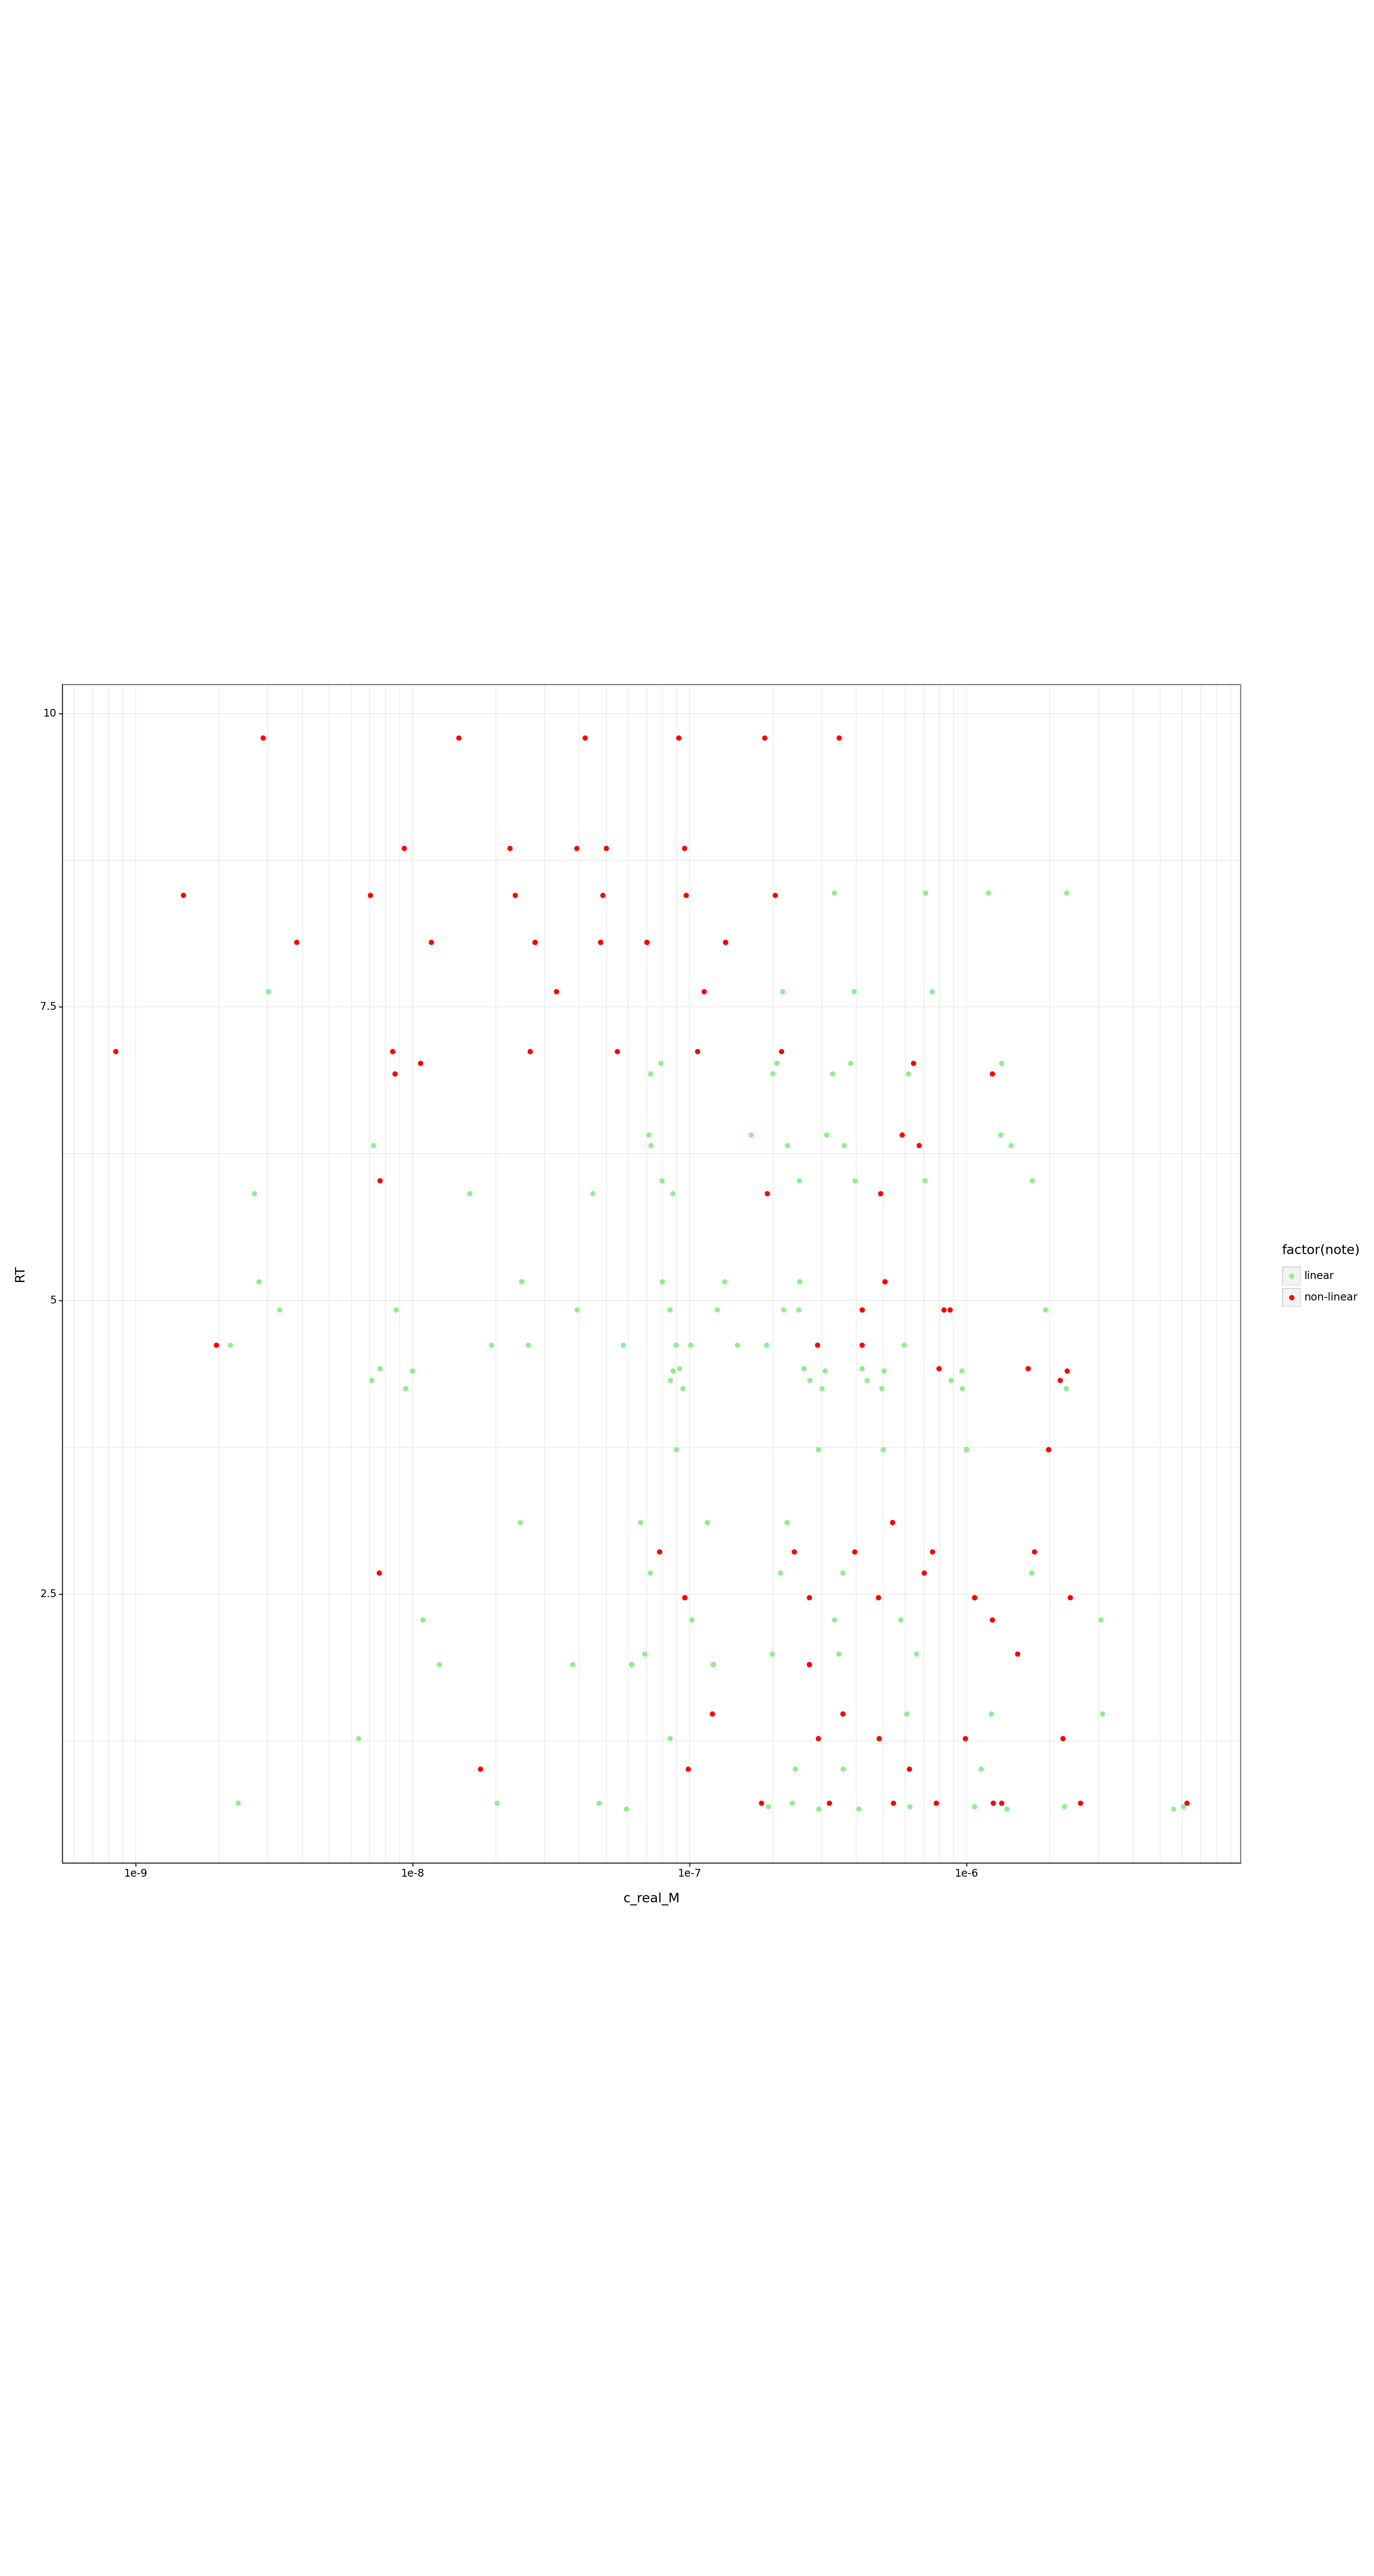

<Figure Size: (1600 x 3000)>

In [65]:
# same plot but log scale x and y
fig_log = (
    ggplot(data = df_calibrations_lab1,
          mapping = aes(x = 'c_real_M', y = 'RT')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    #scale_y_log10() +
    scale_x_log10() +
    theme_bw() +
    theme(figure_size = (16, 30),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          )
)
fig_log

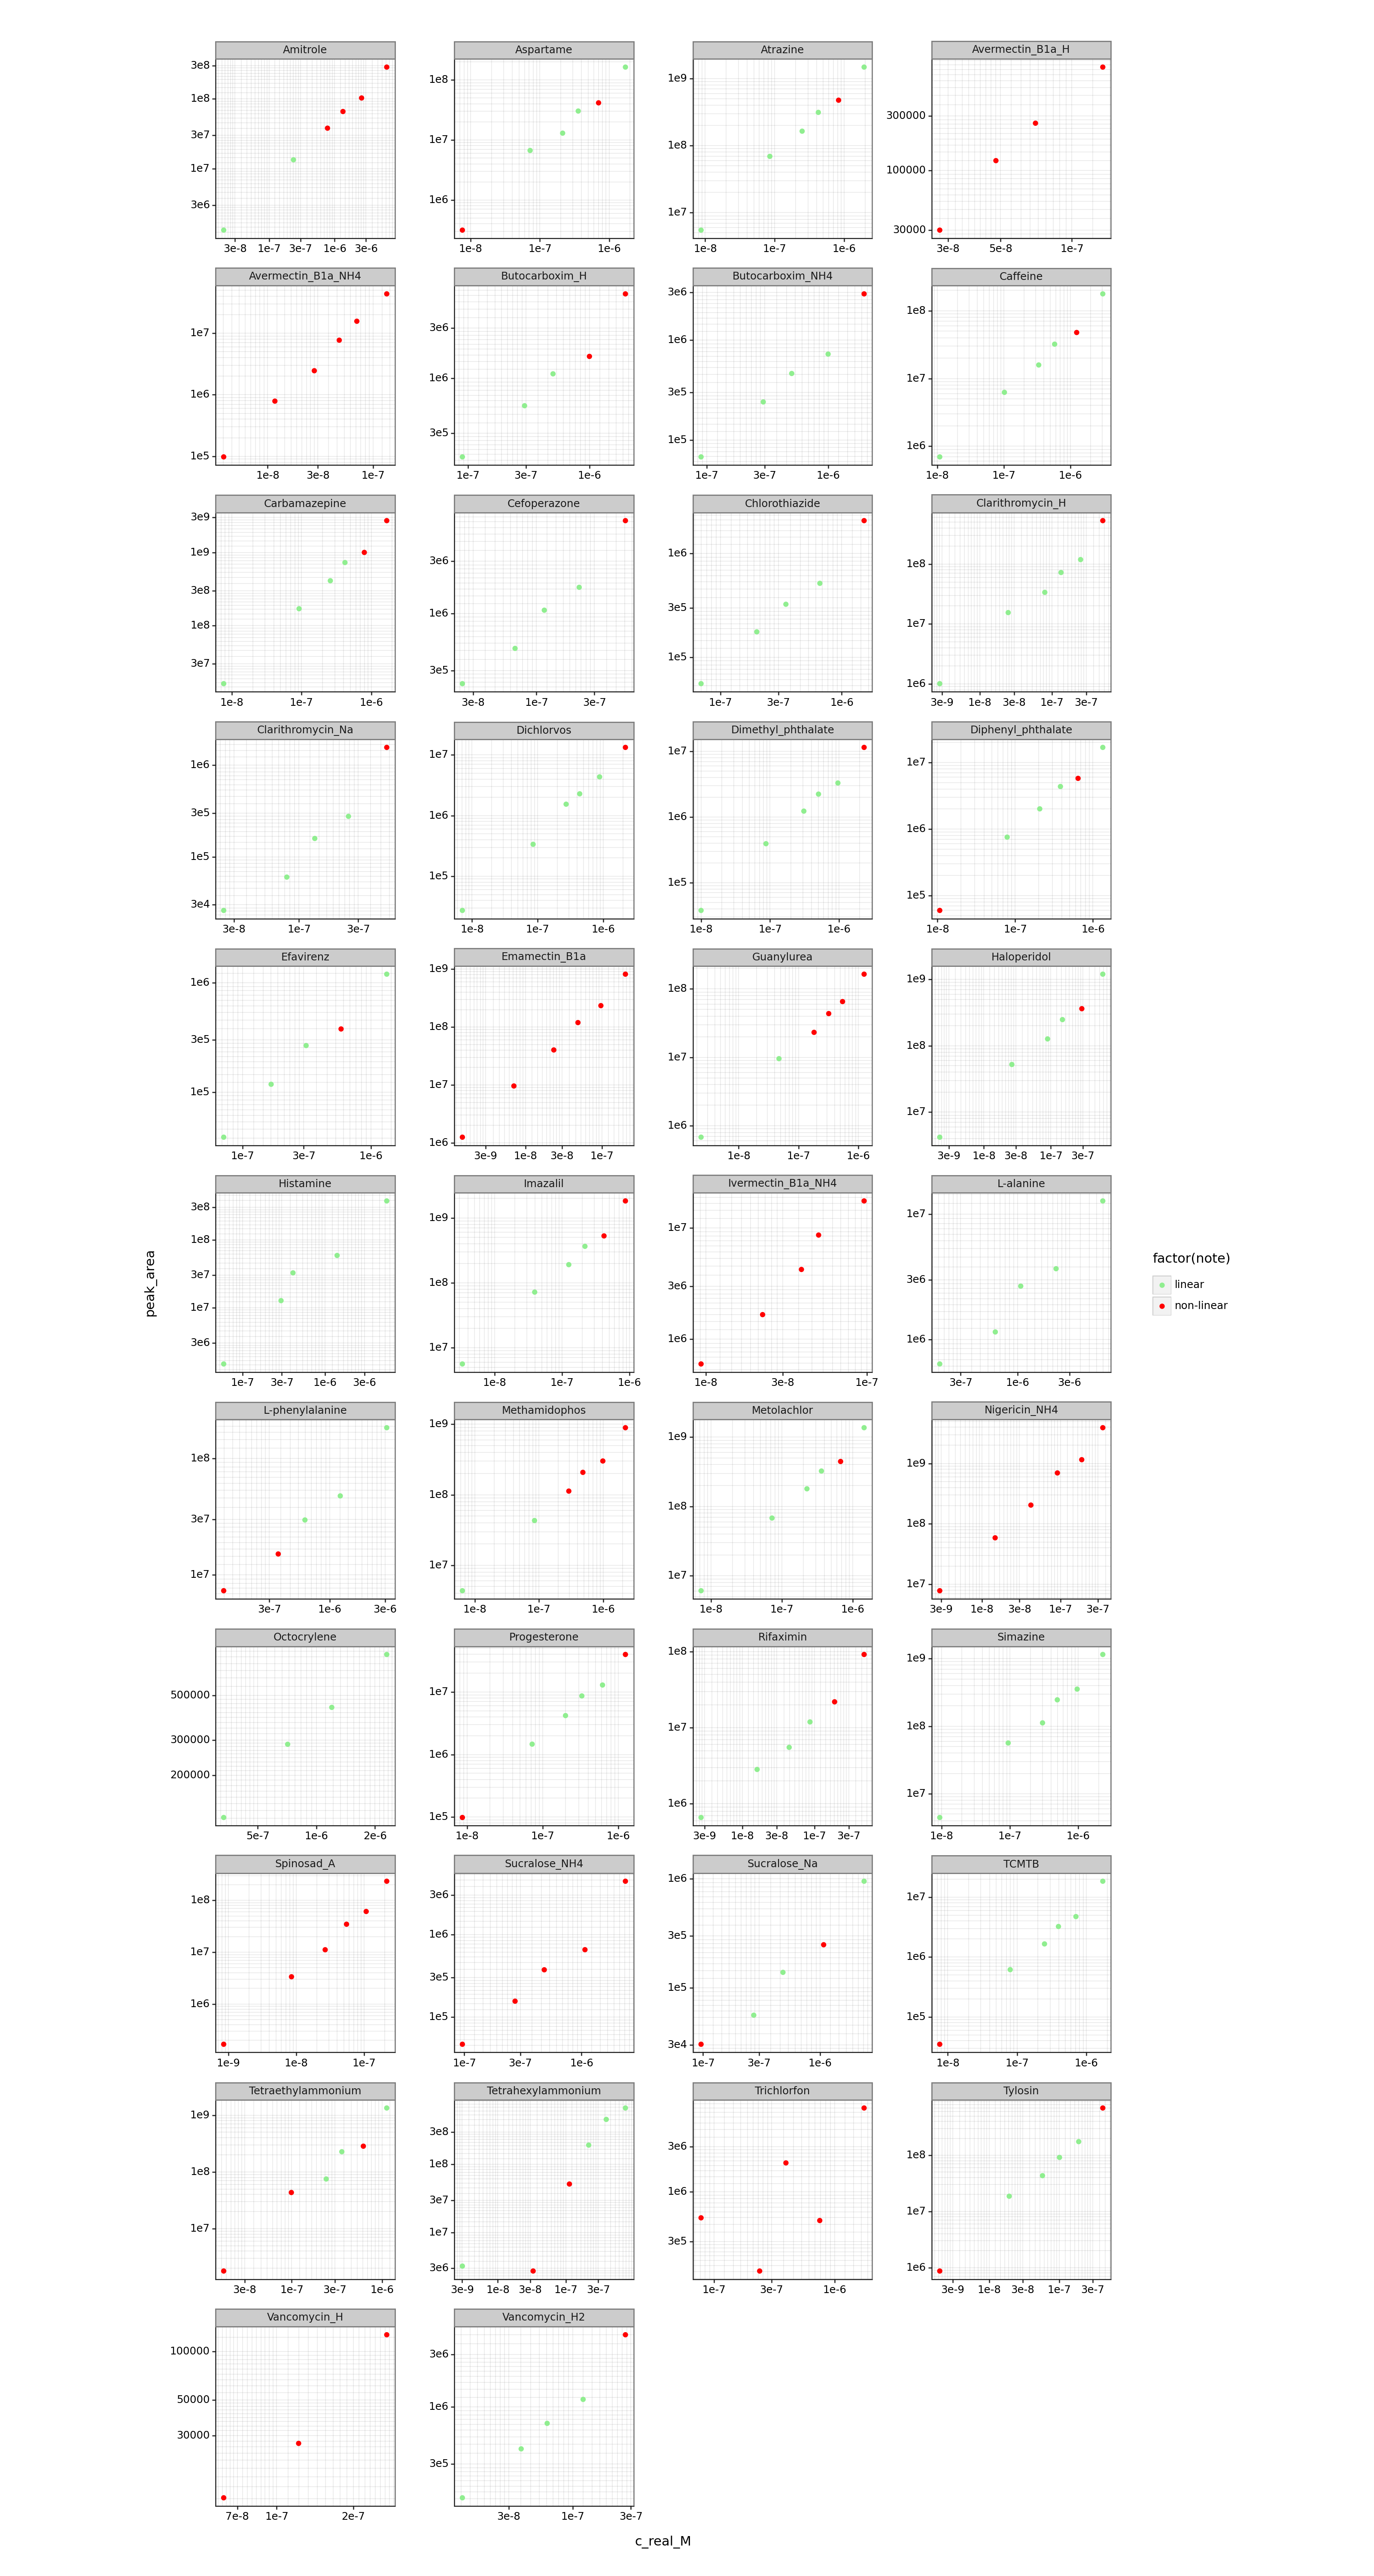

<Figure Size: (1600 x 3000)>

In [5]:
# same plot but log scale x and y
fig_log = (
    ggplot(data = df_calibrations_lab1,
          mapping = aes(x = 'c_real_M', y = 'peak_area')) +
    geom_point(aes(color = "factor(note)")) +
    scale_color_manual(values=("lightgreen", "red")) +
    scale_y_log10() +
    scale_x_log10() +
    theme_bw() +
    facet_wrap("compound",
               ncol=4,
               scales="free") +
    theme(figure_size = (16, 30),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'),
          aspect_ratio=1
          )
)
fig_log

In [29]:
# Split dataset into features and target variable
X = df_calibrations[['RT','peak_area','c_real_M']]
y = df_calibrations[['note']]

In [31]:
print(X)
print(y)

        RT     peak_area      c_real_M
0     0.72  2.856002e+08  6.250000e-06
1     0.72  1.030577e+08  2.580000e-06
2     0.72  6.593301e+07  1.340000e-06
3     0.72  3.805867e+07  7.780000e-07
4     0.72  1.340538e+07  2.350000e-07
...    ...           ...           ...
2968  6.02  1.433499e+07  1.220000e-07
2969  6.02  6.249540e+06  6.190000e-08
2970  6.02  4.135172e+06  3.790000e-08
2971  6.02  1.444159e+06  1.250000e-08
2972  6.02  1.395423e+05  1.490000e-09

[2973 rows x 3 columns]
            note
0     non-linear
1     non-linear
2     non-linear
3     non-linear
4         linear
...          ...
2968      linear
2969      linear
2970      linear
2971      linear
2972      linear

[2973 rows x 1 columns]


In [44]:
# Split dataset into training set and test set
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

In [45]:
print(X_train)
print(y_train)

         RT     peak_area      c_real_M
501    3.25  1.860567e+04  6.900000e-08
119    4.92  3.656199e+08  2.190000e-07
364    9.30  3.186814e+06  2.260000e-07
2411   7.24  5.480500e+04  3.010000e-07
557    6.99  5.111626e+06  8.940000e-08
...     ...           ...           ...
2763  13.17  9.634306e+07  7.980000e-08
905    6.05  1.253500e+05  1.090000e-08
1096  10.75  3.844367e+04  7.260000e-08
235    1.42  2.330957e+05  2.350000e-07
1061   0.78  3.544333e+04  4.720000e-08

[2378 rows x 3 columns]
            note
501       linear
119       linear
364       linear
2411      linear
557   non-linear
...          ...
2763  non-linear
905       linear
1096      linear
235       linear
1061      linear

[2378 rows x 1 columns]


In [ ]:
Random forest, accuracy 65%

In [56]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

df_calibrations = df_calibrations.dropna()

# Split dataset into features and target variable
X = df_calibrations[['RT','peak_area','c_real_M']]
y = df_calibrations[['note']]

y = np.ravel(y)

# Split dataset into training set and test set
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Create a Gaussian Classifier
randomforest = RandomForestClassifier(n_estimators=100, max_depth = 20, min_samples_split = 2, min_samples_leaf = 2)

# Create a RepeatedKFold object
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

# Evaluate the model using cross-validation
scores = cross_val_score(randomforest, X, y, scoring='accuracy', cv=rkf)

# Train the model using the training sets y_pred=clf.predict(X_test)
# randomforest.fit(X_train,y_train)

# Predict the response for test dataset
# y_pred = randomforest.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6509274873524452


In [53]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

df_calibrations = df_calibrations.dropna()

# Split dataset into features and target variable
X = df_calibrations[['RT','peak_area','c_real_M']]
y = df_calibrations[['note']]

y = np.ravel(y)


# Define the hyperparameters grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Gaussian Classifier
randomforest = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=randomforest, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters found by GridSearchCV
print("Best Parameters (Grid Search):", grid_search.best_params_)

# Define the hyperparameters distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=randomforest, param_distributions=param_dist, cv=5)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, y)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters (Random Search):", random_search.best_params_)

Best Parameters (Grid Search): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters (Random Search): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


Best Parameters (Grid Search): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters (Random Search): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}

xgboost, 76% accuracy

In [69]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


mapping = {'linear': 1, 'non-linear': 0}

# Substitute string pattern with number in column 'A'
df_calibrations ['note'] = df_calibrations['note'].replace(mapping)

df_calibrations = df_calibrations.dropna()

# Split dataset into features and target variable
X = df_calibrations[['RT','peak_area','c_real_M']]
y = df_calibrations[['note']]

y = np.ravel(y)

# Split dataset into training set and test set
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Create a XGBoost Classifier
xgboost = xgb.XGBClassifier(n_estimators=100)

# Train the model using the training sets y_pred=xgboost.predict(X_test)
xgboost.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = xgboost.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.760539629005059


In [70]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


mapping = {'linear': 1, 'non-linear': 0}

# Substitute string pattern with number in column 'A'
df_calibrations ['note'] = df_calibrations['note'].replace(mapping)

df_calibrations = df_calibrations.dropna()

# Split dataset into features and target variable
X = df_calibrations[['RT','peak_area','c_real_M']]
y = df_calibrations[['note']]

y = np.ravel(y)

# Split dataset into training set and test set
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

# Create a XGBoost Classifier
xgboost = xgb.XGBClassifier(n_estimators=100)

# Create a RepeatedKFold object
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

# Evaluate the model using cross-validation
scores = cross_val_score(xgboost, X, y, scoring='accuracy', cv=rkf)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.760539629005059


Adaboost, 61% accuracy

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score
import numpy as np

# Create an AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100)

# Create a RepeatedKFold object
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

# Evaluate the model using cross-validation
scores = cross_val_score(adaboost, X, y, scoring='accuracy', cv=rkf)

# Train the model using the training sets
adaboost.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = adaboost.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6087689713322091


Bagging, accuracy 71%

In [72]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score
import numpy as np

# Create a Bagging Classifier
bagging = BaggingClassifier(n_estimators=100)

# Create a RepeatedKFold object
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

# Evaluate the model using cross-validation
scores = cross_val_score(bagging, X, y, scoring='accuracy', cv=rkf)

# Train the model using the training sets
bagging.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = bagging.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7116357504215851


Voting, accuracy 65%

In [73]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np

# Create base learners
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svc = SVC()

# Create a Voting Classifier
voting = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('svc', svc)], voting='hard')

# Create a RepeatedKFold object
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

# Evaluate the model using cross-validation
scores = cross_val_score(voting, X, y, scoring='accuracy', cv=rkf)

# Train the model using the training sets
voting.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = voting.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.654300168634064


Convolutional neural network

In [59]:
# A bit of setup again
import numpy as np
import matplotlib.pyplot as plt


print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (2368, 3)
Train labels shape:  (2368,)
Test data shape:  (593, 3)
Test labels shape:  (593,)


In [62]:
X_train.shape

(2368, 3)

In [64]:
X_train.mean(axis = 1).shape

(2368,)

In [ ]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std